In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset,DataLoader
from torch import nn

In [14]:
torch.manual_seed(42)

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [16]:
df = pd.read_csv('/content/fmnist_small.csv')

In [17]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


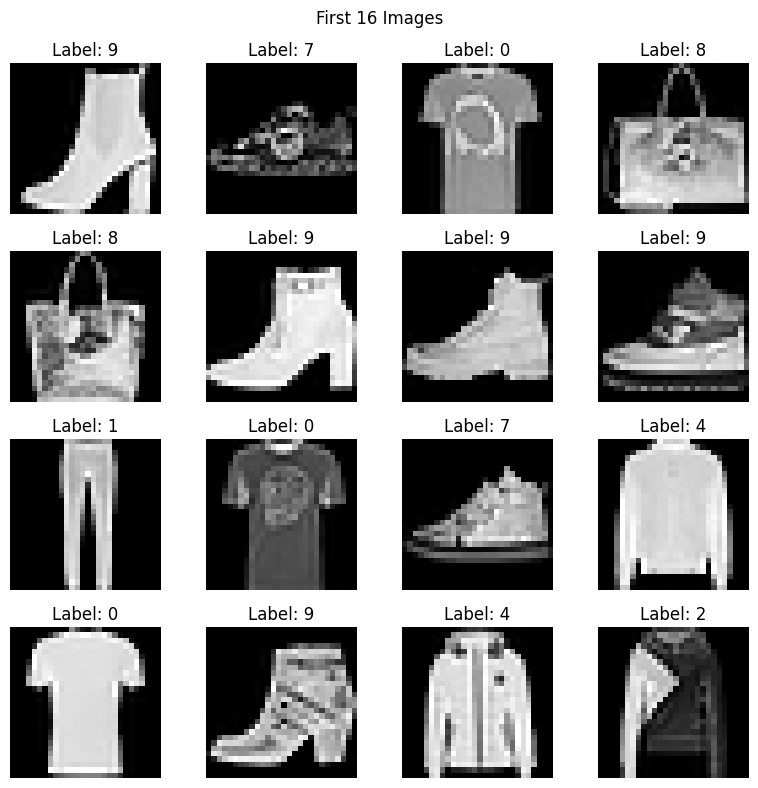

In [18]:

# Create figure and set size
plt.figure(figsize=(8, 8))
plt.suptitle("First 16 Images")

# Loop through the first 16 images
for i in range(16):
    plt.subplot(4, 4, i + 1)  # Create a 4x4 grid of subplots (position starts at 1)

    # Extract image data from DataFrame, reshape to 28x28 pixels
    img = df.iloc[i, 1:].values.reshape(28, 28)

    # Display image in grayscale
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Hide axis for better visualization

    # Add title showing the label
    plt.title(f"Label: {df.iloc[i, 0]}")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

# genreate x and y
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)



In [20]:
X_train.shape , X_test.shape ,y_train.shape , y_test.shape

((4800, 784), (1200, 784), (4800,), (1200,))

In [21]:

# scaling the feautures
X_train = X_train/255.0
X_test = X_test/255.0


In [22]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [23]:
X_train.shape

(4800, 784)

In [24]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]

In [25]:
train_dataset = CustomDataset(X_train, y_train)

In [26]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [27]:
test_dataset = CustomDataset(X_test,y_test)

In [38]:
test_loader = DataLoader(train_dataset , batch_size=32 , shuffle=True , pin_memory = True)
train_loader = DataLoader(test_dataset , batch_size=32 , shuffle= False , pin_memory= True)

In [39]:
class ModelANN (nn.Module) :
  def __init__(self , input_features) :
    super().__init__()
    self.model_1 = nn.Sequential(
        nn.Linear(input_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )

  def forward (self ,x) :
    return self.model_1(x)

In [40]:
X_train.shape[1]

784

In [41]:
model = ModelANN(X_train.shape[1]).to(device)

In [42]:
model.state_dict()

OrderedDict([('model_1.0.weight',
              tensor([[-1.1058e-02,  2.8032e-02,  2.2222e-02,  ...,  2.2687e-02,
                        2.3322e-02,  3.2873e-03],
                      [-6.0879e-03, -1.7775e-02, -8.0178e-04,  ..., -7.0825e-03,
                       -1.6583e-02,  3.1450e-02],
                      [-2.1665e-02, -2.0580e-02,  2.6058e-02,  ..., -4.4099e-05,
                       -1.6688e-02, -1.5892e-02],
                      ...,
                      [ 7.4031e-03, -1.9092e-02,  1.5895e-02,  ..., -2.2057e-02,
                       -9.6768e-03,  2.0382e-02],
                      [ 1.2097e-02, -2.5608e-02,  3.5730e-03,  ..., -9.1146e-03,
                        4.8243e-03,  2.6940e-02],
                      [ 3.5683e-02,  1.1164e-02, -9.8978e-03,  ...,  2.7085e-02,
                        2.7805e-02, -2.5075e-02]], device='cuda:0')),
             ('model_1.0.bias',
              tensor([ 0.0164,  0.0020, -0.0350, -0.0324, -0.0236,  0.0016, -0.0311,  0.0073,
       

In [43]:
loss_fn  = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model.parameters() , lr = 0.1)

In [44]:
for batch_features , batch_labels in train_loader :
  print(batch_features.shape , batch_labels.shape)
  break

torch.Size([32, 784]) torch.Size([32])


In [45]:
y_train.shape

(4800,)

In [46]:
# training loop
epochs = 100
for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)
    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = loss_fn(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 2.1133793090519153
Epoch: 2 , Loss: 1.3689559698104858
Epoch: 3 , Loss: 1.042528919483486
Epoch: 4 , Loss: 0.8920613590039705
Epoch: 5 , Loss: 0.8105831805028414
Epoch: 6 , Loss: 0.7517153981484865
Epoch: 7 , Loss: 0.6992312607012297
Epoch: 8 , Loss: 0.65348472093281
Epoch: 9 , Loss: 0.6139835903519079
Epoch: 10 , Loss: 0.5765200500425539
Epoch: 11 , Loss: 0.5468995971115012
Epoch: 12 , Loss: 0.5200219491594716
Epoch: 13 , Loss: 0.4936543526618104
Epoch: 14 , Loss: 0.47303382817067596
Epoch: 15 , Loss: 0.45511631510759654
Epoch: 16 , Loss: 0.43491151379911525
Epoch: 17 , Loss: 0.41528045817425374
Epoch: 18 , Loss: 0.4012314822328718
Epoch: 19 , Loss: 0.38391399461972087
Epoch: 20 , Loss: 0.37128292847620814
Epoch: 21 , Loss: 0.3576191842163864
Epoch: 22 , Loss: 0.3418531164919075
Epoch: 23 , Loss: 0.33337638036985145
Epoch: 24 , Loss: 0.3130335860738629
Epoch: 25 , Loss: 0.3034323053924661
Epoch: 26 , Loss: 0.29246909465444715
Epoch: 27 , Loss: 0.2865459887604964
Epoch

In [48]:
model.eval()

# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)
    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8020833333333334
